In [1]:
from neuralnet.neuralnet import *
from neuralnet import plotter

## NeuralNet - Check Visualization Functions

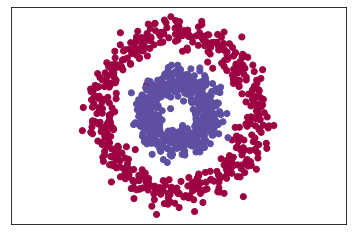

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_blobs

# Create Artificial Dataset
X, Y = make_circles(1000, noise=0.1, factor=0.4, shuffle=True)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Spectral")
plt.xticks([])
plt.yticks([])
plt.show()

# Split on test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=10)

### Training

In [3]:
%matplotlib inline
nn = NeuralNet(
    layer_shapes=(
        (2, 100),
        (100, 100),
        (100, 1),
    ),
    visual_mode=False
)

nn.optimize(Xtrain, Ytrain, epochs=6000, batch_size=64, learning_rate=5e-2, show_after=1000)


Epoch 0 | Error: -0.020620824 | WV0: -2.365e-06 | WV1: 0.000120793
Epoch 1000 | Error: 0.037887512 | WV0: -0.001240227 | WV1: -0.001700691
Epoch 2000 | Error: 1.8447e-05 | WV0: 7.6136e-05 | WV1: -1.1489e-05
Epoch 3000 | Error: -0.000136474 | WV0: 6.803e-05 | WV1: 5.262e-06
Epoch 4000 | Error: -5.755e-05 | WV0: 3.3135e-05 | WV1: 1.579e-06
Epoch 5000 | Error: -5.078e-06 | WV0: 2.1497e-05 | WV1: -1.577e-06


### Validation

In [4]:
train_forwards = nn.forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission on Training Set: {round(precision, 2) * 100}%")

forwards = nn.forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission on Test set: {round(precision, 2) * 100}%")

Precission on Training Set: 100.0%
Precission on Test set: 99.0%


In [5]:
colors = np.around(forwards[-1]).astype("str")
colors[colors == "0.0"] = "salmon"
colors[colors == "1.0"] = "skyblue"

### Prediction plot on test set

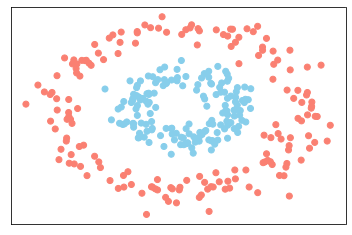

In [9]:
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=colors.flatten())
plt.xticks([])
plt.yticks([])
plt.show()

### Decision Function

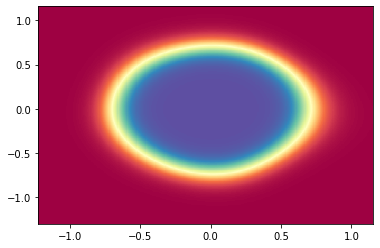

In [7]:
plotter.plot_decision_function(Xtest[:, 0], Xtest[:, 1], nn)

### Error History

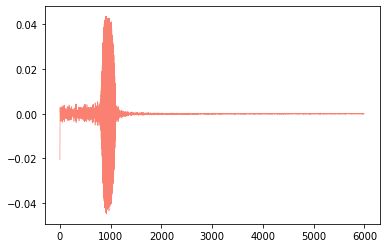

In [8]:
plotter.plot_error_history(nn.ophist.mean_error_per_epoch)